<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-no-supervisado/blob/main/An%C3%A1lisis_Exploratorio_Vehiculos_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from google.colab import files  #funcion para subir archivo csv a google colab

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Leer datos 

Dataset obtenido de [Kaggle](https://www.kaggle.com/abineshkumark/carsdata/)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Aprendizaje-no-supervisado/main/Datos/cars.csv', na_values = " ")                   
print(df.shape)
df.head()

(261, 8)


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


## Exploración y transformación de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    258 non-null    float64
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


La primera observación es que las columnas tienen espacios en blancos y la segunda es que existen algunos valores nulos.

In [4]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

Vamos a corregir los nombes de las columnas:

In [5]:
#quitar espacios en blanco de los nombres de las columnas
columnas=[]
for i in df.columns:
  i = i.replace(' ','')
  columnas.append(i)

df.columns = columnas
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

### Datos faltantes
¿Cuántos datos faltantes tenemos por columna?



In [6]:
df.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64


Tenemos las siguientes alternativas:
1. Remover renglones con valores faltantes

  `dropna()`
2. Imputar valores faltante con el promedio, la mediana o la moda de la columna.

  `fillna(df.columna.mean())`
3. Valor estimado mediante otro modelo de aprendizaje de máquina.

Optaremos por imputar valores

In [8]:
#ver los casos con valores faltantes en la variable "cubicinches"
df[df['cubicinches'].isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [9]:
df['cubicinches'].describe()

count    259.000000
mean     200.918919
std      109.258305
min       68.000000
25%       99.500000
50%      156.000000
75%      303.000000
max      455.000000
Name: cubicinches, dtype: float64

al observar la distribución de la variable```cubicinches´´´ observamos que la desviación estándar es muy amplia, por ello, analizaremos la distribución de la variable según el número de cilindros del coche, para ello, utilizamos la función groupby





In [10]:
df.groupby('cylinders')['cubicinches'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,2.0,75.000000,7.071068,70.0,72.5,75.0,77.50,80.0
4,125.0,107.744000,20.861256,68.0,91.0,98.0,120.00,156.0
5,3.0,145.000000,33.286634,121.0,126.0,131.0,157.00,183.0
6,53.0,216.886792,32.180178,146.0,199.0,225.0,250.00,262.0
8,76.0,348.552632,48.095570,260.0,307.0,350.0,384.75,455.0


con los resultados anteriores, optamos por imputar el valor medio del cilindraje en el grupo de los vehículos con 6 cilindros.

In [12]:
df['cubicinches'] = df['cubicinches'].fillna(216.886792)
df.loc[[40,180],:]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,216.886792,105,3897.0,19,1976,US.
180,19.8,6,216.886792,85,2990.0,18,1980,US.


Ahora analizaremos los datos faltantes en la variable peso ("weightlibs")

In [ ]:
df[df['weightlbs'].isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225.0,90,NaN,19,1981,US.
33,21.0,6,199.0,90,NaN,15,1971,US.
172,29.0,4,68.0,49,NaN,20,1974,Europe.


#### Ejercicio: 
Remplazar los valores nulos de la variable peso (*weightlibs*) por algun valor conveniente.

In [13]:
#  por ahora los vamos a eliminar

print(df.shape)  #renglones y columnas antes de eliminar los valores nulos

df = df.dropna()

df.shape        # renglones y columnas despúes de eliminarlos

(261, 8)


(258, 8)

## Distribución y correlación entre variables

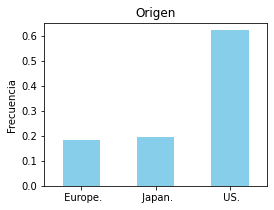

In [ ]:
g = df['brand'].value_counts(normalize=True).sort_index().plot(kind='bar',
                                       rot=0, 
                                       color='skyblue', figsize=(4,3))
g.set(ylabel='Frecuencia', title='Origen')
plt.show()

In [ ]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,23.187109,5.589844,201.351562,106.800781,3006.445312,15.496094,1976.828125
std,7.870573,1.746631,109.572151,40.686792,855.572147,2.905030,3.635575
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.800000,4.000000,100.250000,75.000000,2245.750000,14.000000,1974.000000
50%,22.000000,5.000000,156.000000,95.000000,2832.500000,16.000000,1977.000000
75%,28.850000,8.000000,304.000000,139.000000,3666.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


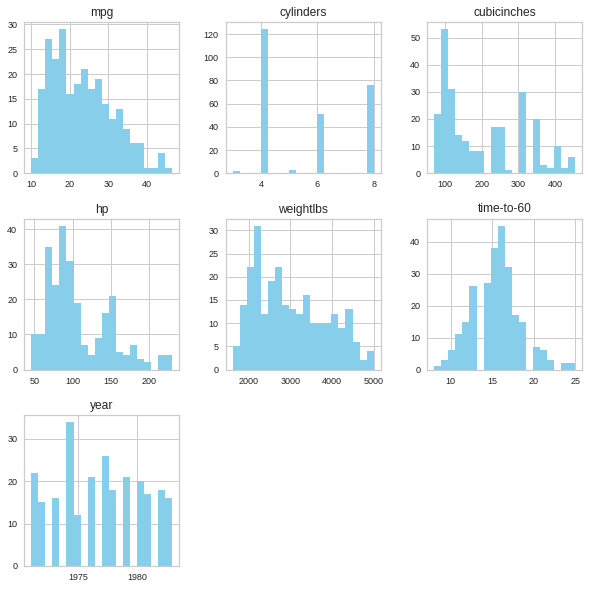

In [ ]:
df.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue', bins=20)
plt.show()

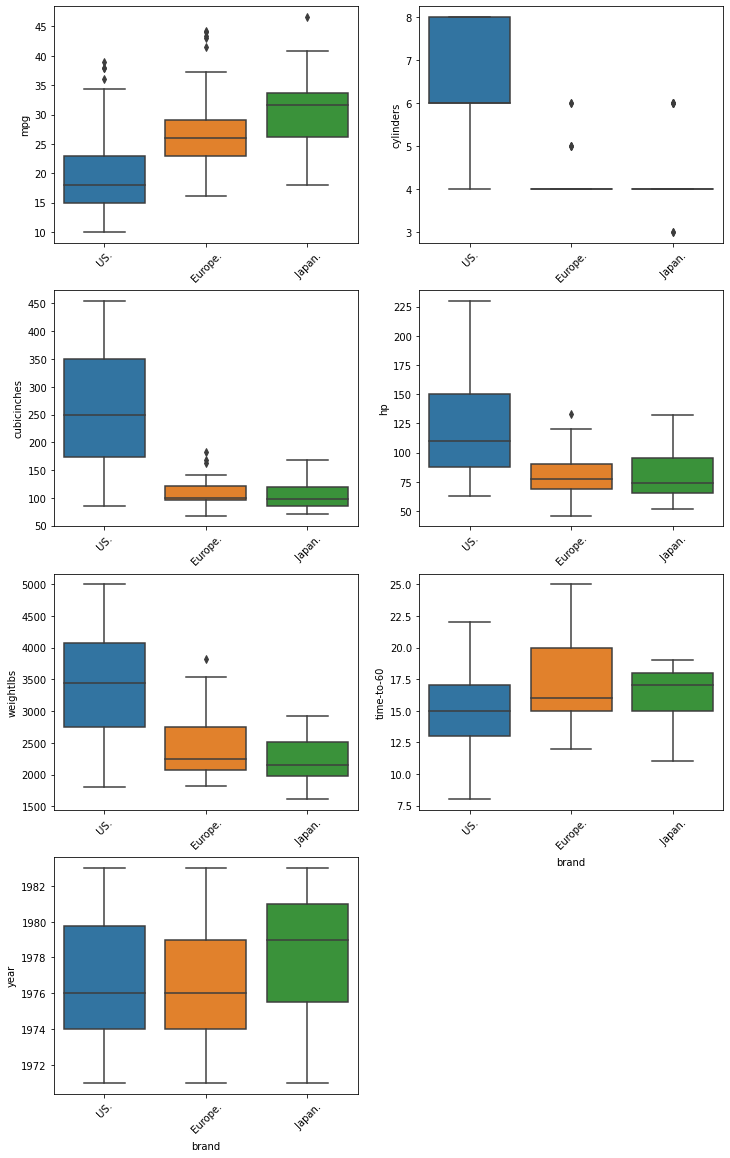

In [ ]:
variables = df.columns[:7]  #seleccionar columnas, excepto 'Brand'
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
for var, subplot in zip(variables, ax.flatten()):
    sns.boxplot(x = 'brand', y = var, data = df, ax=subplot, showfliers=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
ax.flat[-1].set_visible(False) 

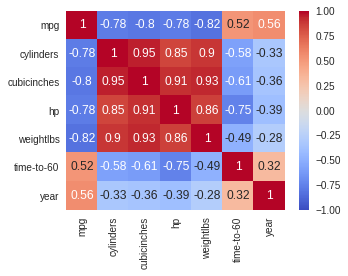

In [ ]:
def correlacion(dataframe, grafica = True):
    corr=dataframe.corr()                #creamos la matriz de correlación
    fig = plt.figure(figsize = (5, 4))
    if grafica == True:
        sns.heatmap(corr,  cmap="coolwarm", 
                    vmin=-1, vmax=1,  center=0, 
                    annot=True, square=False)
        fig.tight_layout()
    return corr
correlaciones = correlacion(df)

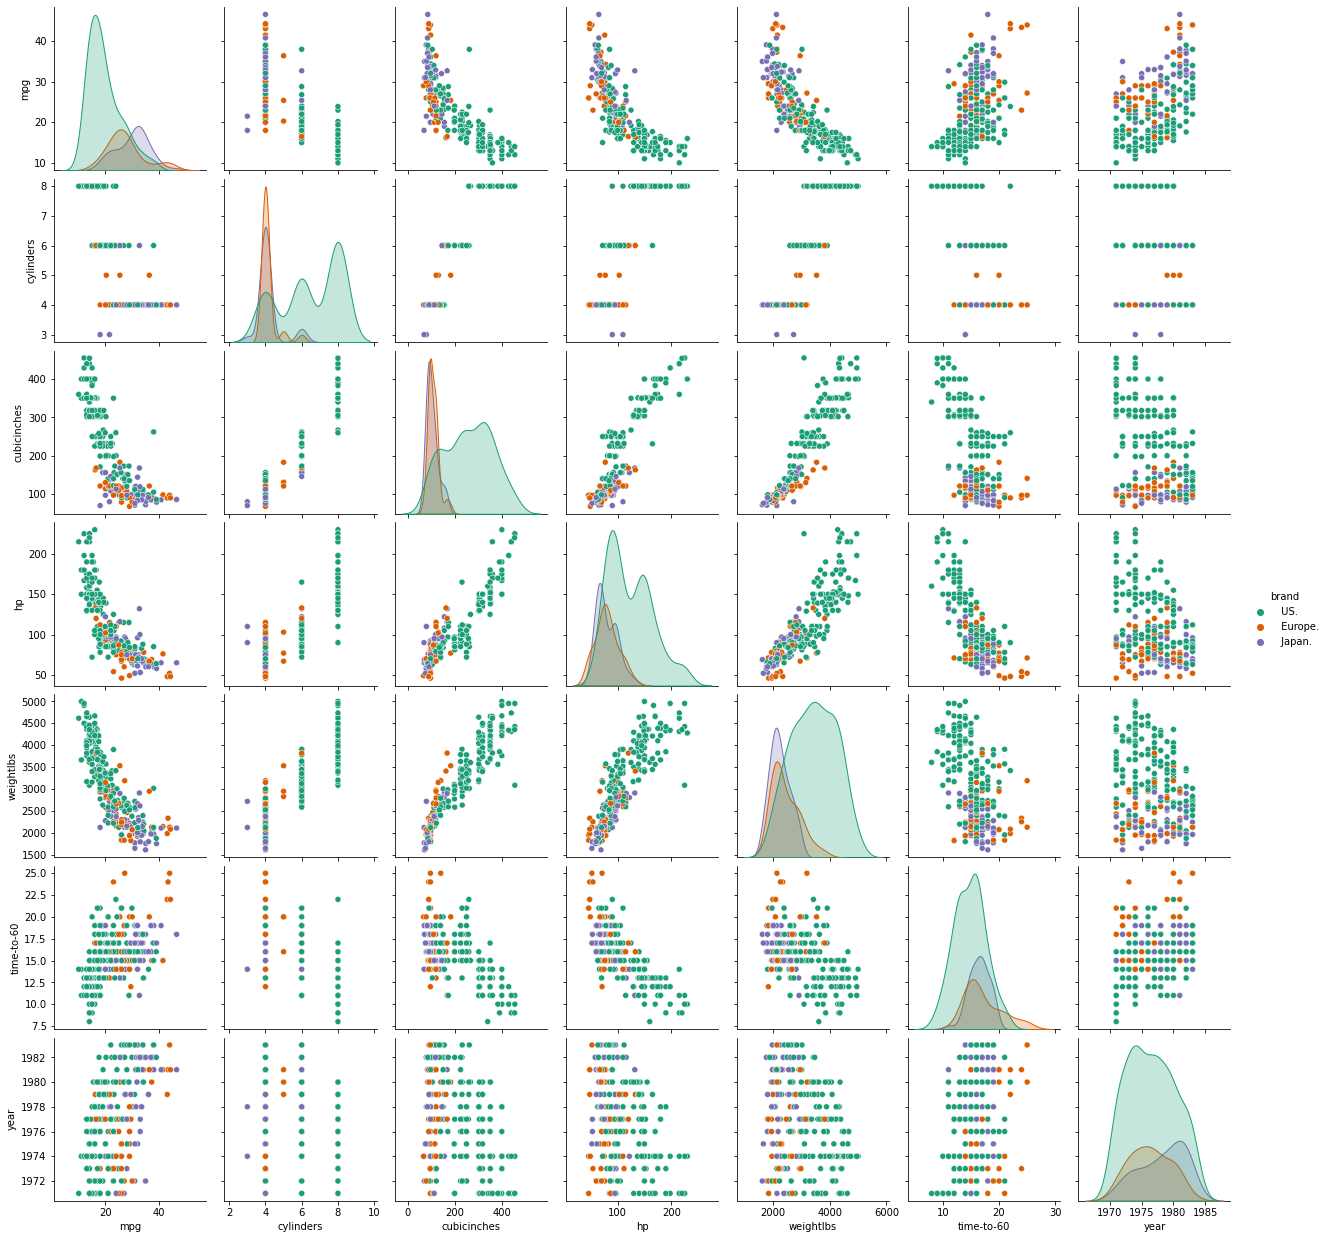

In [ ]:
g_= sns.pairplot(df, palette ='Dark2', 
                 hue='brand'
                 )
plt.show()

In [ ]:
fig = px.scatter_3d(df, x='time-to-60', y='weightlbs', z='mpg',
                    color='brand', size='cubicinches',
                    title="3D Scatter Plot")
#fig.update_traces(marker=dict(size=3,),
#                  selector=dict(mode='markers'))

fig.show()